### Sample Data - HUDK 4050

Data Source: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021).
Predict Students' Dropout and Academic Success.
UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

In [48]:
# Import Data and libraries

# Prereqs - -  Only need to run once
# !pip install ucimlrepo 
# !pip install seaborn
# !pip install matplotlib
# !pip install plotly_express
# !pip install scikit-learn
# !pip install xgboost
# !pip install catboost
# !pip install lightgbm
# !pip install shap 


import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
from ucimlrepo import fetch_ucirepo 


In [49]:
 
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 


Lets look at the description of this data:

In [50]:
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 

{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

What variables and data types do we have?

In [51]:
# variable information 
print(predict_students_dropout_and_academic_success.variables) 

                                              name     role         type  \
0                                   Marital Status  Feature      Integer   
1                                 Application mode  Feature      Integer   
2                                Application order  Feature      Integer   
3                                           Course  Feature      Integer   
4                       Daytime/evening attendance  Feature      Integer   
5                           Previous qualification  Feature      Integer   
6                   Previous qualification (grade)  Feature   Continuous   
7                                      Nacionality  Feature      Integer   
8                           Mother's qualification  Feature      Integer   
9                           Father's qualification  Feature      Integer   
10                             Mother's occupation  Feature      Integer   
11                             Father's occupation  Feature      Integer   
12          

Lets look at the data:

In [52]:
# Combine x and y to create a df
import pandas as pd
df = pd.concat([X, y], axis=1)
df.head()



,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


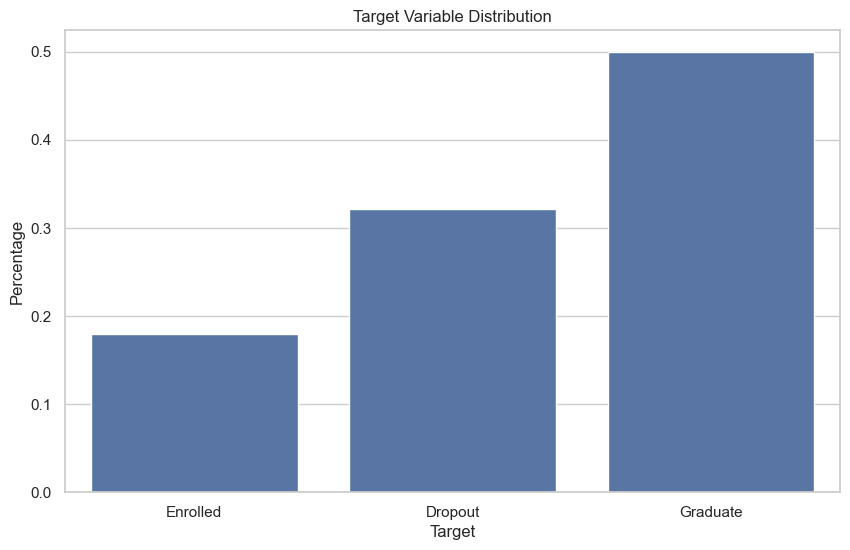

In [53]:
target= df["Target"].value_counts(normalize=True).sort_values()

# Plot the target variable
plt.figure(figsize=(10,6))
sns.barplot(x=target.index, y=target.values)
plt.title("Target Variable Distribution")
plt.ylabel("Percentage")
plt.xlabel("Target")
plt.show()





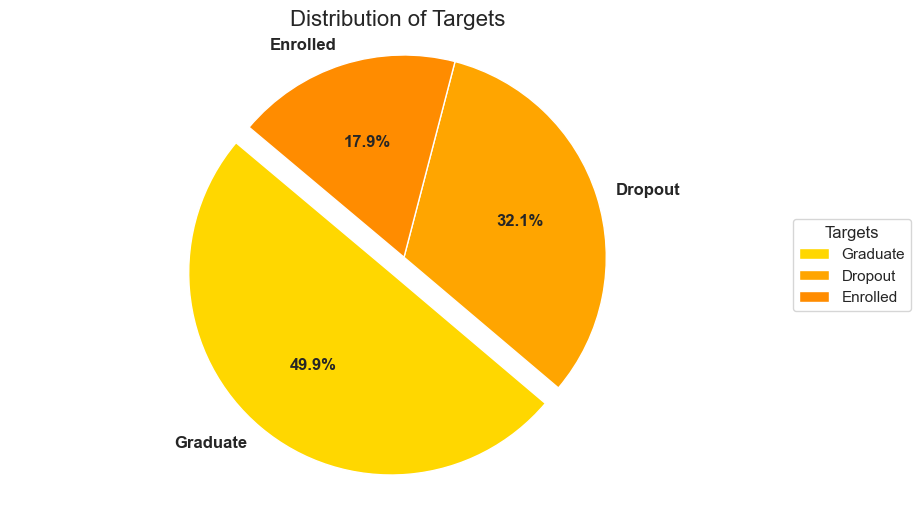

In [54]:
data = df['Target'].value_counts()
labels = data.index
sizes = data.values
colors = ['#FFD700', '#FFA500', '#FF8C00']
explode = (0.1, 0, 0)

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.setp(texts, size=12, weight="bold")
plt.setp(autotexts, size=12, weight="bold")

ax.set_title('Distribution of Targets', fontsize=16)

ax.legend(wedges, labels, title="Targets", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()

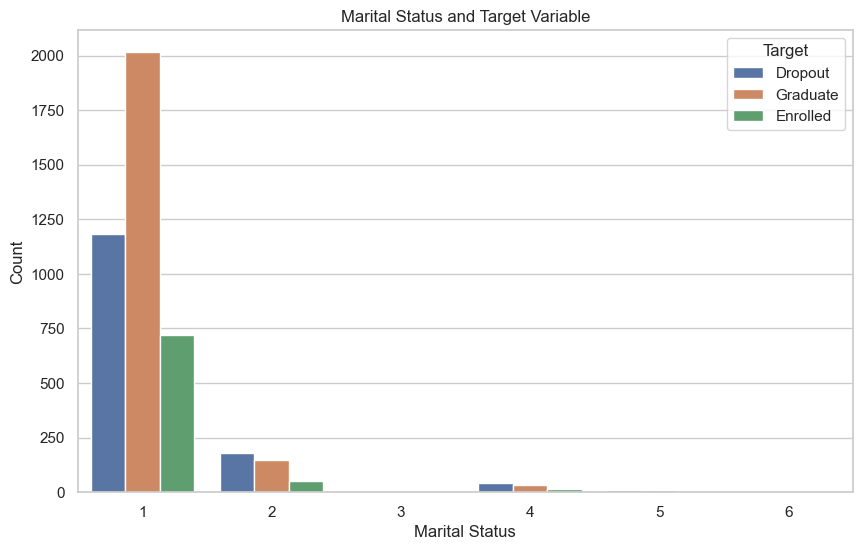

In [55]:
# Plot marital status and target variable
plt.figure(figsize=(10,6))
sns.countplot(x="Marital Status", hue="Target", data=df)
plt.title("Marital Status and Target Variable")
plt.ylabel("Count")
plt.xlabel("Marital Status")
plt.show()


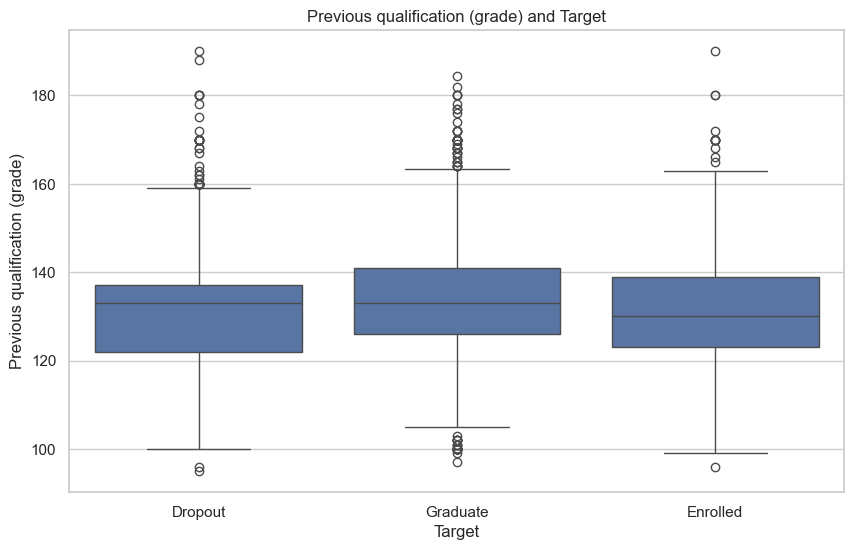

In [56]:
# show continuous variables relationship between Previous qualification (grade) and Target
plt.figure(figsize=(10,6))
sns.boxplot(x="Target", y="Previous qualification (grade)", data=df)
plt.title("Previous qualification (grade) and Target")
plt.ylabel("Previous qualification (grade)")
plt.xlabel("Target")
plt.show()



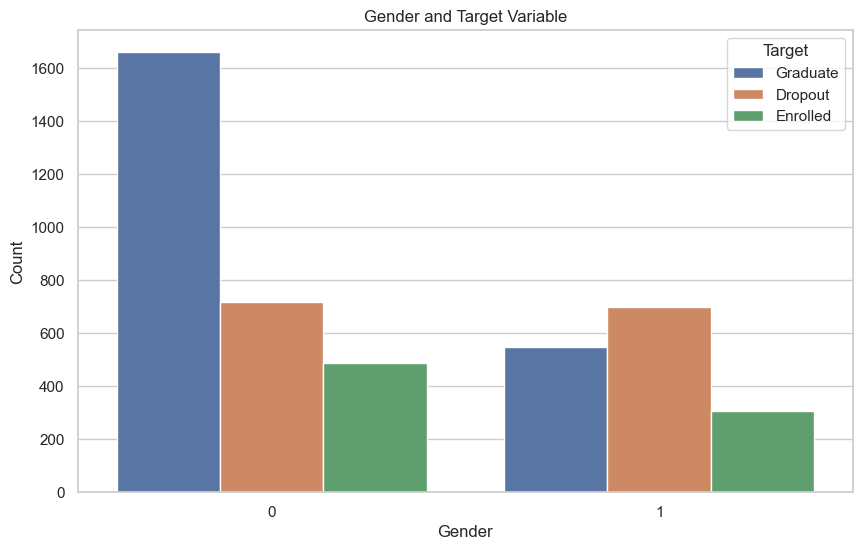

In [57]:
# Plot relationship between Gender column and Target 
# 1 – male 0 – female
plt.figure(figsize=(10,6))
sns.countplot(x="Gender", hue="Target", data=df)
plt.title("Gender and Target Variable")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.show()


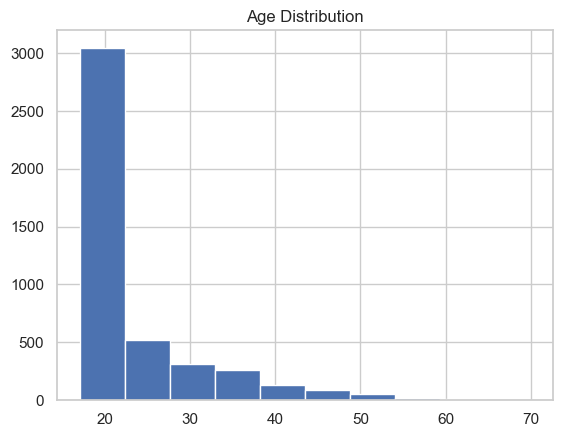

In [58]:
plt.hist(df["Age at enrollment"])
plt.title("Age Distribution");

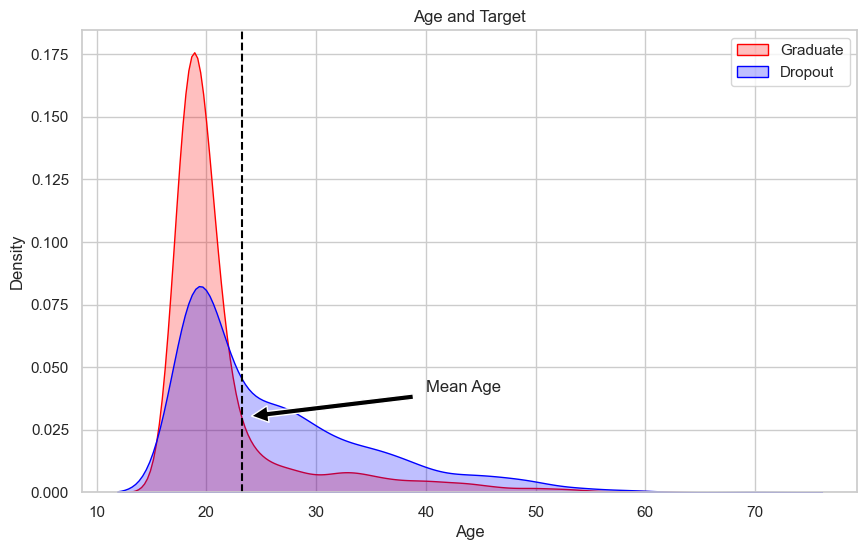

In [59]:
# add metrics to density plot
plt.figure(figsize=(10,6))
sns.kdeplot(df["Age at enrollment"][df["Target"] == 'Graduate'], color="red", fill=True)
sns.kdeplot(df["Age at enrollment"][df["Target"] == 'Dropout'], color="blue", fill=True)
plt.legend(['Graduate', 'Dropout'])
plt.title("Age and Target")
plt.xlabel("Age")
plt.ylabel("Density")
plt.axvline(x=df["Age at enrollment"].mean(), color='black', linestyle='--')
plt.annotate("Mean Age", xy=(df["Age at enrollment"].mean(), 0.03), xytext=(40, 0.04),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


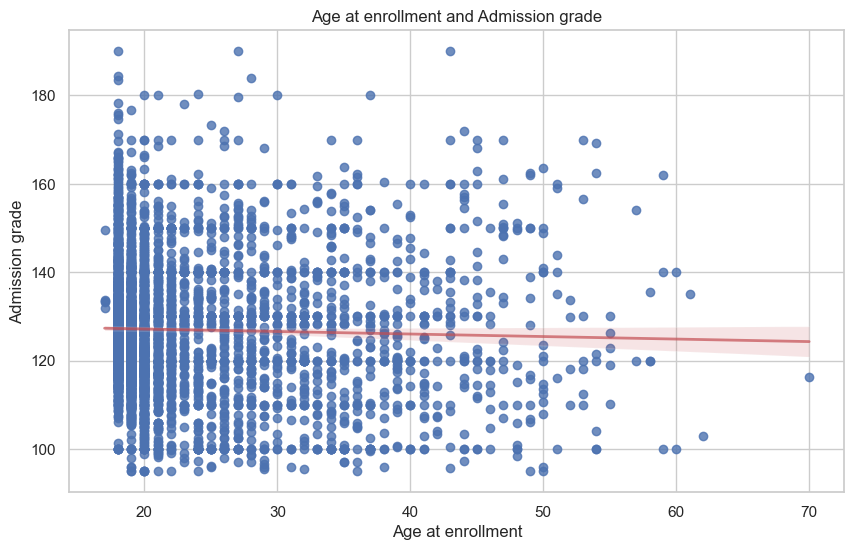

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Admission grade   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.961
Date:                Tue, 11 Jun 2024   Prob (F-statistic):             0.0466
Time:                        15:04:53   Log-Likelihood:                -18100.
No. Observations:                4424   AIC:                         3.620e+04
Df Residuals:                    4422   BIC:                         3.622e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               128.3065      0.702    182.763      0.000     126.930     129.683
Age at enrollment    -0.0571      0.029     -1.990      0.047      -0.113      -0.001
==============================================================================
Omnibus:                      251.906   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.920
Skew:                           0.559   Prob(JB):                     2.50e-69
Kurtosis:                       3.682   Cond. No.                         79.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# add a line of best fit
plt.figure(figsize=(10,6))
sns.regplot(x="Age at enrollment", y="Admission grade", data=df, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title("Age at enrollment and Admission grade")
plt.ylabel("Admission grade")
plt.xlabel("Age at enrollment")
plt.show()

# add formula and r squared value and p value to plot

import statsmodels.api as sm
X = df["Age at enrollment"]
y = df["Admission grade"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()




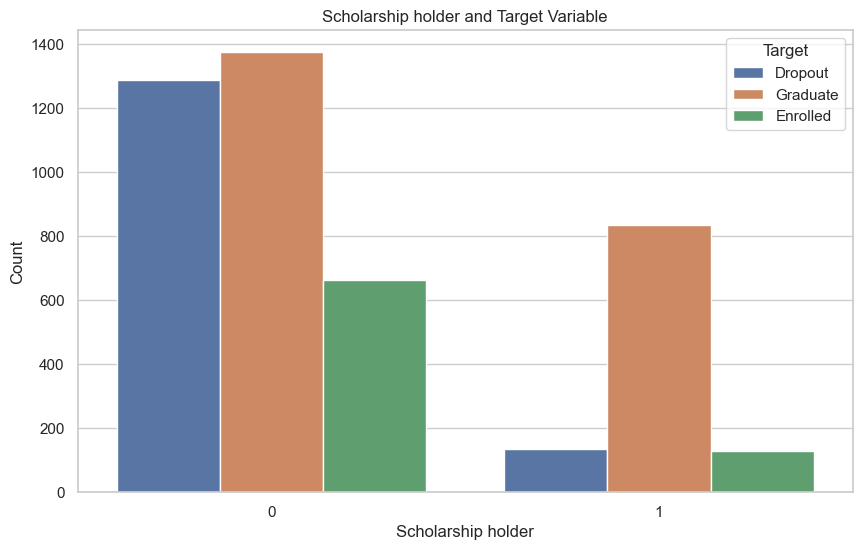

In [61]:
# plot binary Scholarship holder and Target
plt.figure(figsize=(10,6))
sns.countplot(x="Scholarship holder", hue="Target", data=df)
plt.title("Scholarship holder and Target Variable")
plt.ylabel("Count")
plt.xlabel("Scholarship holder")
plt.show()


In [62]:
# test if there is a significant difference between the two groups
from scipy.stats import ttest_ind
graduate = df[df["Target"] == "Graduate"]
dropout = df[df["Target"] == "Dropout"]
ttest_ind(graduate["Scholarship holder"], dropout["Scholarship holder"])

TtestResult(statistic=19.85154961505394, pvalue=2.4405641941935053e-83, df=3628.0)

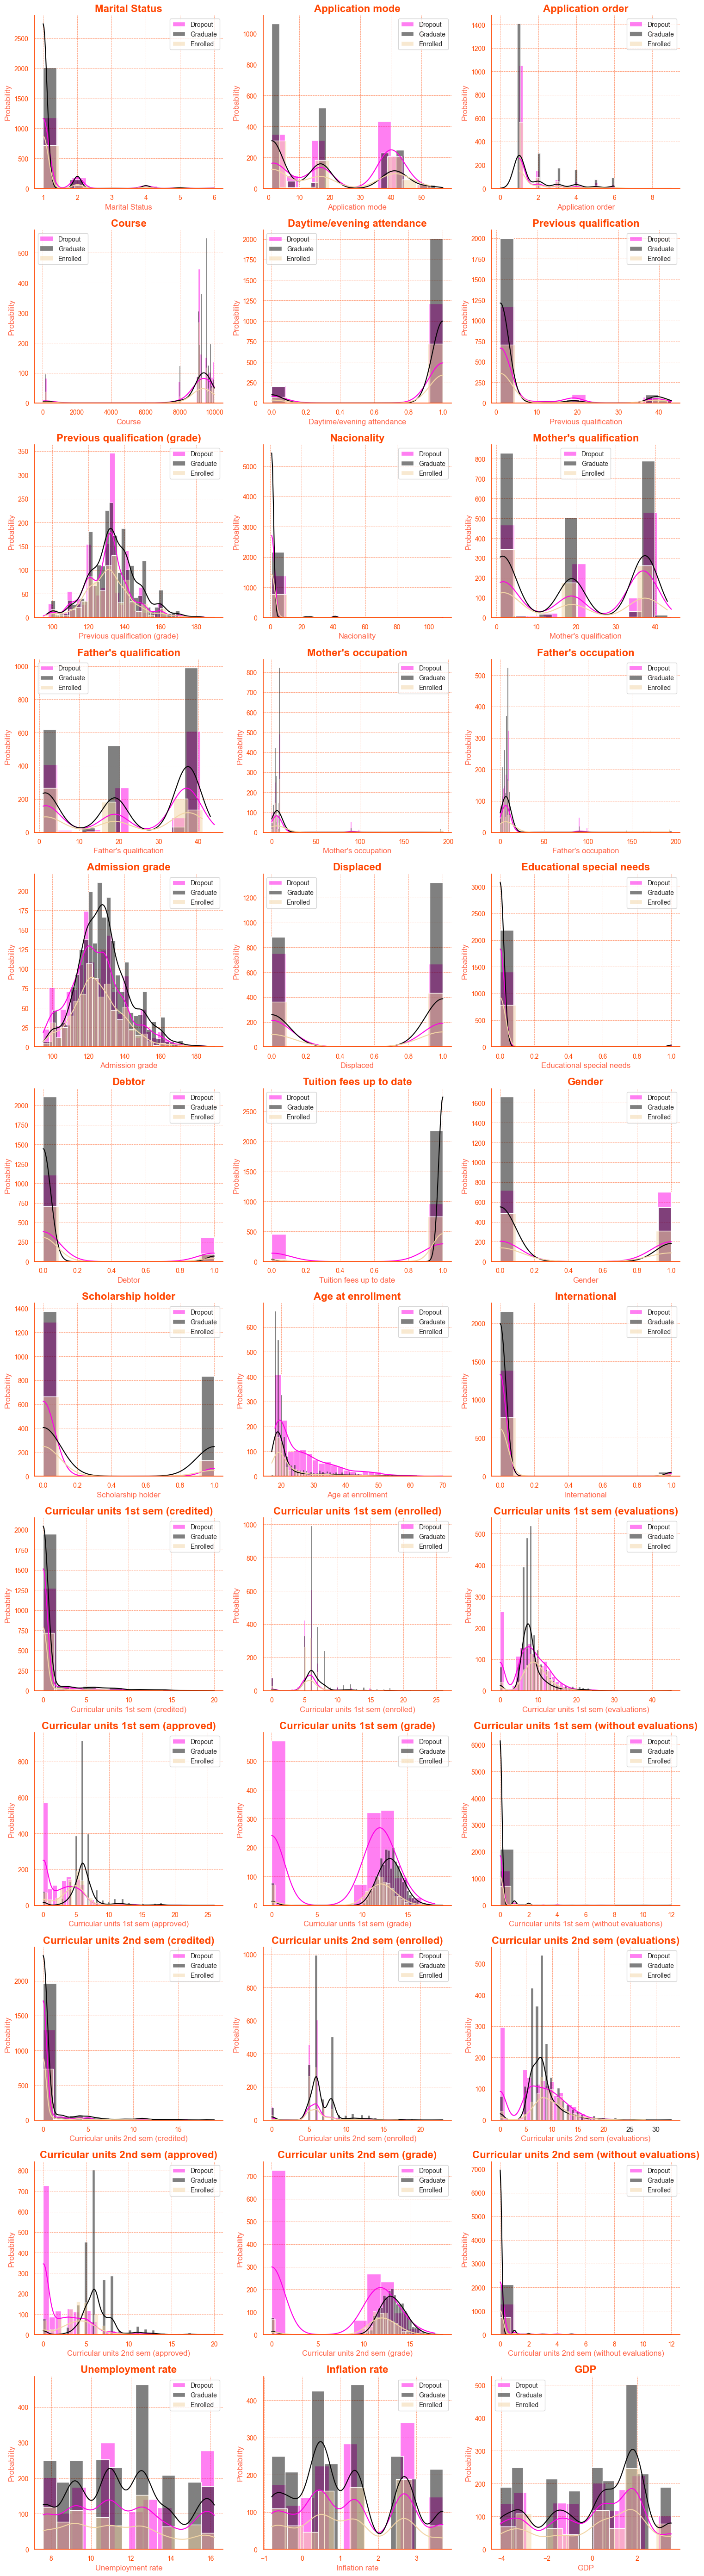

In [63]:
colors = ['#ff00e6', '#030303', '#f2d5a5']
sns.set(style="whitegrid")
fig = plt.figure(figsize=(15, 60))
i = 1
for label in df.drop('Target', axis=1).columns:
    plt.subplot(13, 3, i) 
    for idx, target in enumerate(df['Target'].unique()):
        sns.histplot(df[df['Target'] == target][label], color=colors[idx], label=target, alpha=0.5, kde=True)
    plt.title(label, fontsize=16, color='#FF4500', fontweight='bold') 
    plt.xlabel(label, fontsize=12, color='#FF6347')  
    plt.ylabel('Probability', fontsize=12, color='#FF6347')  
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5, color='#FF4500', alpha=0.7) 
    plt.xticks(fontsize=10, color='#FF4500')  
    plt.yticks(fontsize=10, color='#FF4500') 
    plt.gca().spines['top'].set_visible(False)  
    plt.gca().spines['right'].set_visible(False)  
    plt.gca().spines['left'].set_color('#FF4500')  
    plt.gca().spines['bottom'].set_color('#FF4500')  
    i += 1

plt.tight_layout()
plt.show()

# Handling missing values 


In [64]:
# randomly delete 10% of the values in Previous qualification (grade) and Father's Qualification (grade) columns
df["Previous qualification (grade)"] = df["Previous qualification (grade)"].sample(frac=0.7)
df["Father's Qualification (grade)"] = df["Father's qualification"].sample(frac=0.9)

# check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values


Previous qualification (grade)    1327
Father's Qualification (grade)     442
dtype: int64

In [65]:
# Lets find missing values in the dataset
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
missing_values = missing_values / df.shape[0] * 100
missing_values = pd.DataFrame(missing_values, columns=["Missing Values Percentage"])
print(missing_values)

                                Missing Values Percentage
Previous qualification (grade)                  29.995479
Father's Qualification (grade)                   9.990958


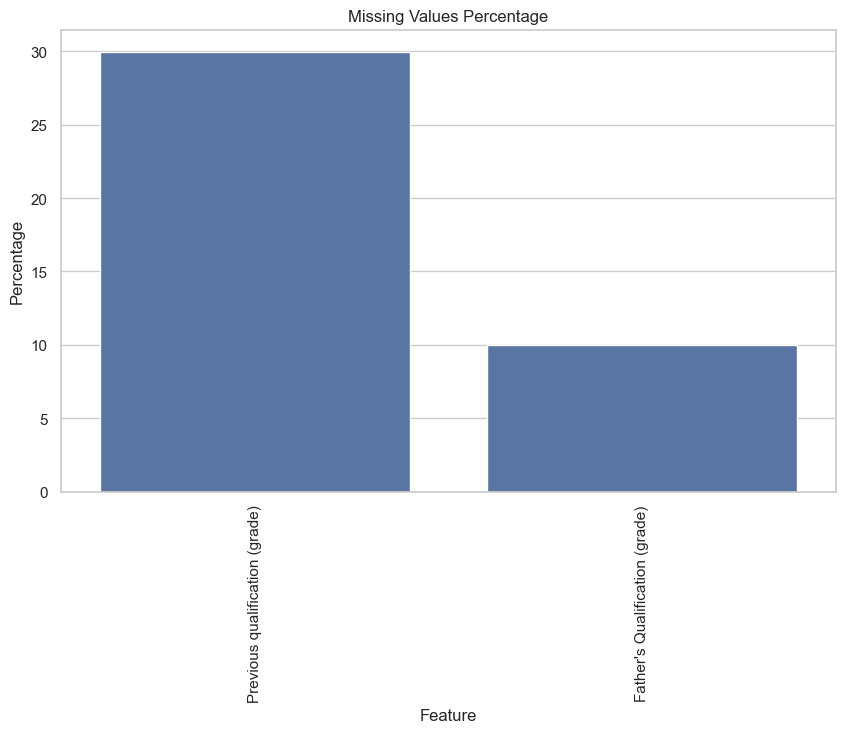

In [66]:
# plot the missing values
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values.index, y=missing_values["Missing Values Percentage"])
plt.title("Missing Values Percentage")
plt.ylabel("Percentage")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()


In [67]:
# fill missing values with the mean / mode

# create a function to fill missing values with the mean, mode, or median, or a specific value, or the previous value, or the next value, or a constant value
def fill_missing_values(df, column, method="mean"):
    if method == "mean":
        df[column] = df[column].fillna(df[column].mean())
    elif method == "mode":
        df[column] = df[column].fillna(df[column].mode()[0])
    elif method == "median":
        df[column] = df[column].fillna(df[column].median())
    else:
        df[column] = df[column].fillna(method)
    return df

# fill missing values with the mean
df = fill_missing_values(df, "Previous qualification (grade)", method="mean")
df = fill_missing_values(df, "Father's Qualification (grade)", method="mean")

# check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values


Series([], dtype: int64)

# Outliers 

In [68]:
# identify outliers in the dataset
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# find outliers in the Previous qualification (grade) column
outliers = find_outliers(df, "Previous qualification (grade)")
outliers


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Father's Qualification (grade)
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,22.361376
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,37.000000
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,38.000000
7,1,18,4,9254,1,1,119.0,1,37,37,...,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout,37.000000
13,1,53,1,9254,1,42,110.0,1,1,1,...,6,8,5,11.000000,0,8.9,1.4,3.51,Graduate,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,2,39,1,9773,1,1,100.0,1,37,37,...,6,10,6,11.666667,0,12.7,3.7,-1.70,Dropout,37.000000
4411,1,44,1,9130,1,39,150.0,1,37,37,...,6,11,3,13.333333,0,13.9,-0.3,0.79,Dropout,37.000000
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout,1.000000
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate,37.000000


In [69]:

# drop the outliers
# df = df.drop(outliers.index)

# # replace the outliers with the median
# median = df["Previous qualification (grade)"].median()
# df.loc[outliers.index, "Previous qualification (grade)"] = median

# # replace the outliers with the mean
# mean = df["Previous qualification (grade)"].mean()
# df.loc[outliers.index, "Previous qualification (grade)"] = mean

# winsorize outliers
from scipy.stats.mstats import winsorize
df["Previous qualification (grade)"] = winsorize(df["Previous qualification (grade)"], limits=[0.05, 0.05])

# check for outliers
# outliers = find_outliers(df, "Previous qualification (grade)")
# outliers



# Process Data 

Mapping and rev_mapping are dictionaries used to map target class labels to numerical values and vice versa.


In [70]:
# Drop current students from target variable
df_encoded = df[df["Target"] != "Enrolled"]

# remap 'Dropout' to 1 and 'Graduate' to 0
df_encoded["Target"] = df_encoded["Target"].map({"Dropout": 1, "Graduate": 0})

C:\Users\chadc\AppData\Local\Temp\ipykernel_17592\1426073035.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded["Target"] = df_encoded["Target"].map({"Dropout": 1, "Graduate": 0})


In [71]:
df_encoded

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Father's Qualification (grade)
0,1,17,5,171,1,1,122.000000,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,1,22.361376
1,1,15,1,9254,1,1,132.599839,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,0,3.000000
2,1,1,5,9070,1,1,122.000000,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,1,37.000000
3,1,17,2,9773,1,1,132.599839,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,0,37.000000
4,2,39,1,8014,0,1,115.000000,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,0,38.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.000000,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,0,1.000000
4420,1,1,2,9773,1,1,120.000000,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,1,1.000000
4421,1,1,1,9500,1,1,132.599839,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,1,37.000000
4422,1,1,1,9147,1,1,151.000000,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,0,37.000000


# Model Preperation / Feature Selection

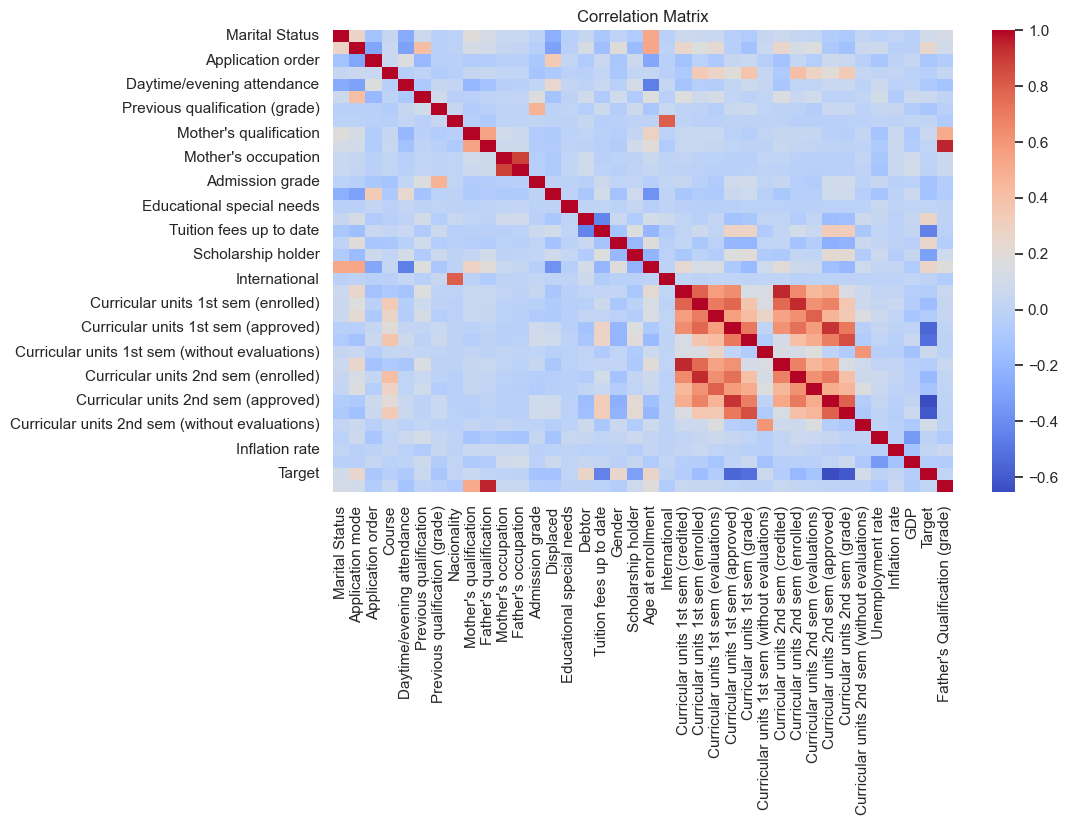

In [72]:
# Function for forward selection and take the top 10 features
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

def forward_selection(df, target, n_features):
    X = df.drop(target, axis=1)
    y = df[target]
    selector = SelectKBest(score_func=f_classif, k=n_features)
    selector.fit(X, y)
    return X.columns[selector.get_support()]

# select the top 10 features
features = forward_selection(df_encoded, "Target", 10)
features

# create a correlation matrix
correlation = df_encoded.corr()

# plot a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [73]:
# only keep the target and features from the top 10 features

# add 'Target' to the features list
features = list(features)
features.append("Target")

df_encoded = df_encoded[features]

df_encoded



,Application mode,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,17,0,1,1,0,20,0,0.000000,0,0.000000,1
1,15,0,0,1,0,19,6,14.000000,6,13.666667,0
2,1,0,0,1,0,19,0,0.000000,0,0.000000,1
3,17,0,1,0,0,20,6,13.428571,5,12.400000,0
4,39,0,1,0,0,45,5,12.333333,6,13.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
4419,1,0,1,1,0,19,5,13.600000,5,12.666667,0
4420,1,1,0,0,0,18,6,12.000000,2,11.000000,1
4421,1,0,1,0,1,30,7,14.912500,1,13.500000,1
4422,1,0,1,0,1,20,5,13.800000,5,12.000000,0


# Build some Models

Initialization of Models:

**Four** different machine learning models are initialized: *RandomForestClassifier, CatBoostClassifier, XGBClassifier, and Logistic Regression Classifier*. Each model is configured with default parameters.


Accuracy: 89.26%
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       449
           1       0.90      0.81      0.85       277

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



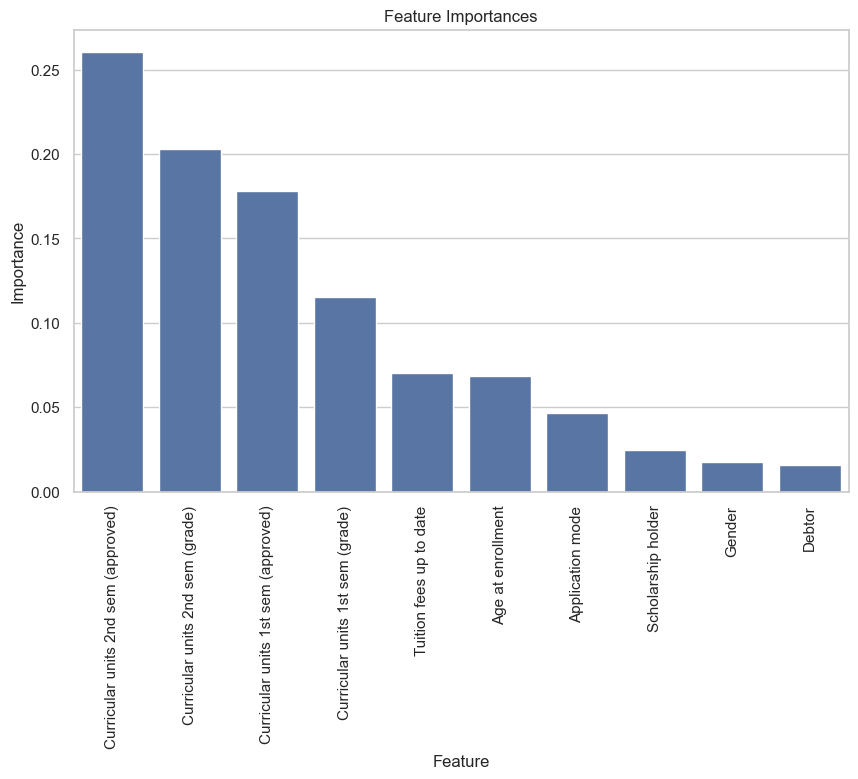

In [74]:
# create a test and training set and then make a binary classification model using a random forest classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

# make predictions
y_pred = model1.predict(X_test)

# evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

# plot the feature importances
importances = model1.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=features[indices], y=importances[indices])
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()


Accuracy: 88.02%
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       449
           1       0.87      0.80      0.84       277

    accuracy                           0.88       726
   macro avg       0.88      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



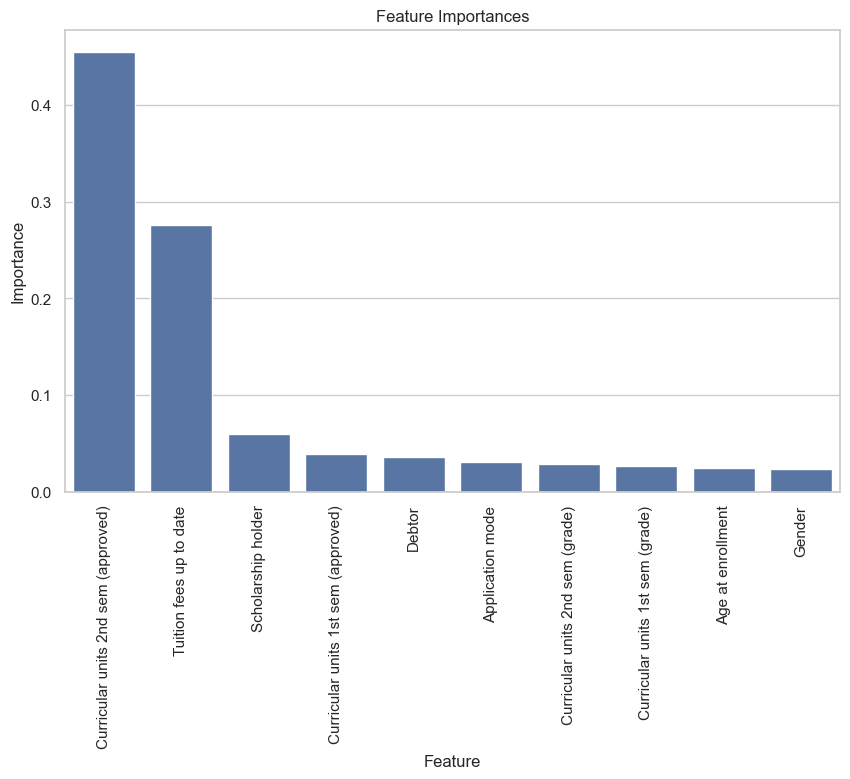

In [75]:
# Build a model using XGBoost
from xgboost import XGBClassifier

model2 = XGBClassifier(random_state=42)
model2.fit(X_train, y_train)

# make predictions
y_pred = model2.predict(X_test)

# evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

# plot the feature importances
importances = model2.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=features[indices], y=importances[indices])
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()



Accuracy: 89.26%
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       449
           1       0.89      0.82      0.85       277

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



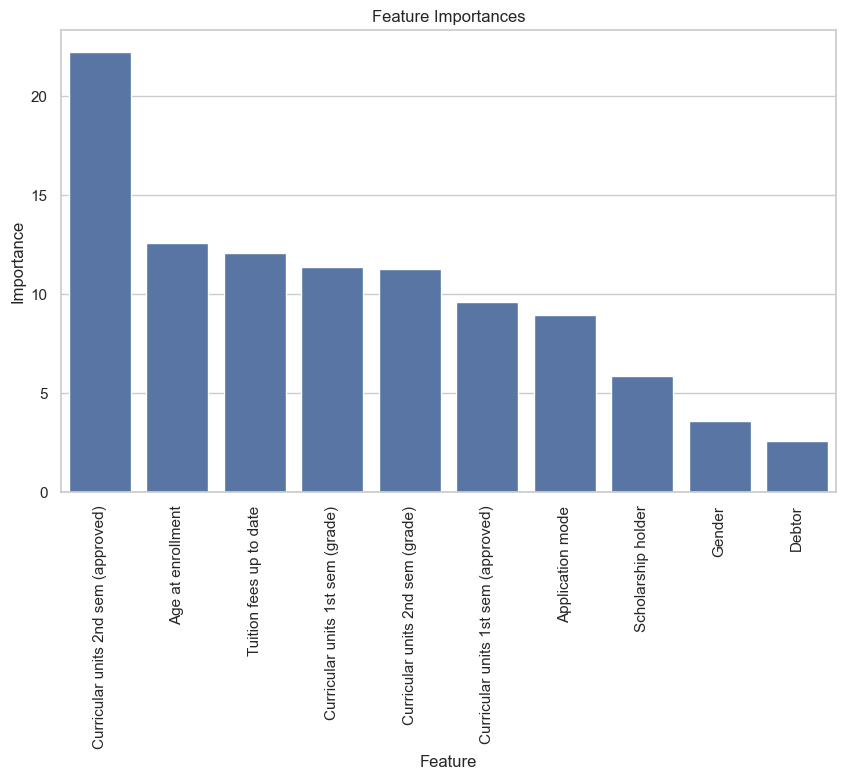

In [76]:
# Build a model using CatBoost
from catboost import CatBoostClassifier

model3 = CatBoostClassifier(random_state=42, verbose=0)
model3.fit(X_train, y_train)

# make predictions
y_pred = model3.predict(X_test)

# evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

# plot the feature importances
importances = model3.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=features[indices], y=importances[indices])
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()


Accuracy: 88.71%
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       449
           1       0.90      0.79      0.84       277

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



C:\Users\chadc\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


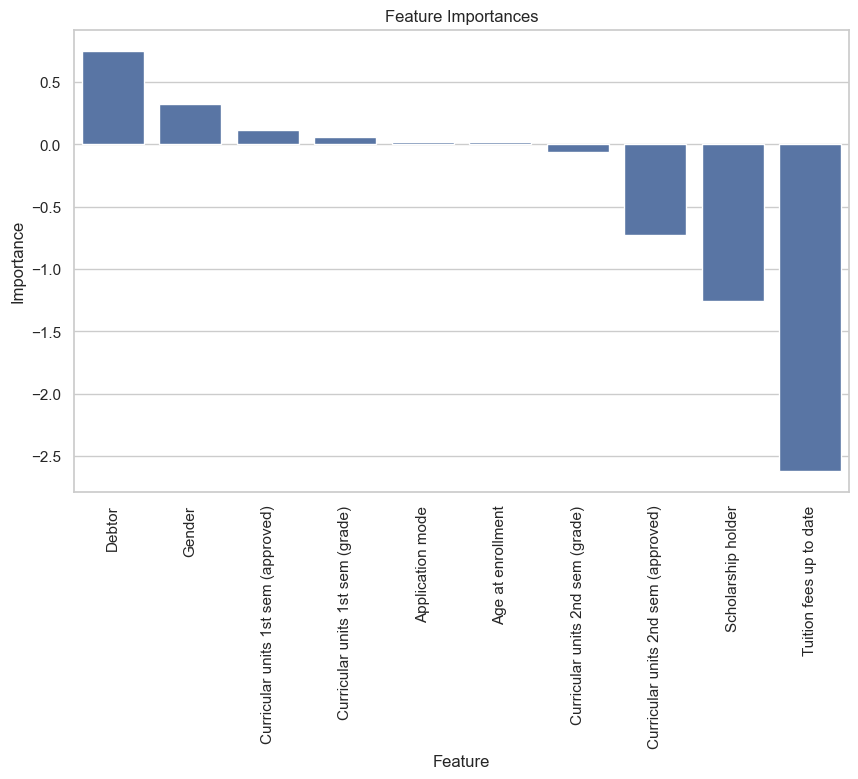

In [77]:
# Build a model using logistic regression
from sklearn.linear_model import LogisticRegression

model4 = LogisticRegression(random_state=42)
model4.fit(X_train, y_train)

# make predictions
y_pred = model4.predict(X_test)

# evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

# plot the feature importances
importances = model4.coef_[0]
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=features[indices], y=importances[indices])
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()


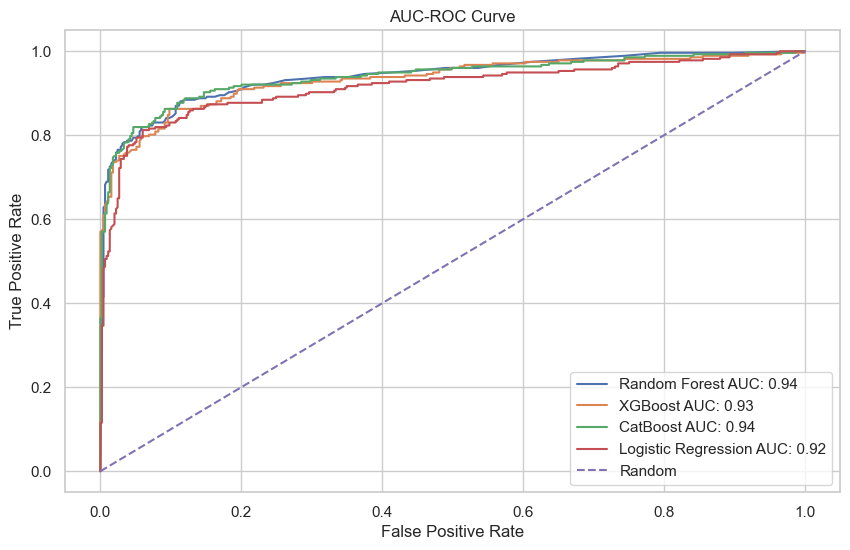

In [78]:
# plot AUC-ROC curve between model and model1

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba1 = model1.predict_proba(X_test)[:, 1]
y_pred_proba2 = model2.predict_proba(X_test)[:, 1]
y_pred_proba3 = model3.predict_proba(X_test)[:, 1]
y_pred_proba4 = model4.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba1)
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba2)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba3)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_proba4)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f"Random Forest AUC: {roc_auc_score(y_test, y_pred_proba1):.2f}")
plt.plot(fpr1, tpr1, label=f"XGBoost AUC: {roc_auc_score(y_test, y_pred_proba2):.2f}")
plt.plot(fpr2, tpr2, label=f"CatBoost AUC: {roc_auc_score(y_test, y_pred_proba3):.2f}")
plt.plot(fpr3, tpr3, label=f"Logistic Regression AUC: {roc_auc_score(y_test, y_pred_proba4):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()






# Generate risk predictions on enrolled students

In [79]:
# generate predictions on students that are enrolled
df_enrolled = df[df["Target"] == "Enrolled"]
df_enrolled = df_enrolled.drop("Target", axis=1)

# select only the relevant columns used during training
df_enrolled = df_enrolled[X.columns]

# make predictions
y_pred = model1.predict(df_enrolled)

# add the predictions to the dataframe
df_enrolled["Prediction"] = y_pred

df_enrolled



,Application mode,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Prediction
16,18,0,1,0,0,18,1,12.000000,2,11.000000,1
19,1,0,1,0,0,18,6,11.666667,6,13.500000,0
21,18,0,1,0,0,20,7,11.437500,8,11.425000,0
25,1,1,1,0,1,18,5,11.600000,4,11.000000,0
27,1,0,1,0,0,18,5,12.666667,4,13.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
4397,5,0,1,0,0,21,5,12.600000,3,11.666667,1
4402,18,0,1,1,0,18,5,12.600000,6,13.000000,0
4406,1,0,1,1,0,20,4,12.000000,2,11.333333,1
4412,43,0,1,1,1,19,4,13.000000,5,12.200000,0


In [111]:
#relabel predictions where 1 is dropout and 0 is graduate
df_enrolled["Prediction_cat"] = df_enrolled["Prediction"].map({1: "Dropout", 0: "Graduate"})
df_enrolled

,Application mode,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Prediction,Prediction_cat
16,18,0,1,0,0,18,1,12.000000,2,11.000000,1,Dropout
19,1,0,1,0,0,18,6,11.666667,6,13.500000,0,Graduate
21,18,0,1,0,0,20,7,11.437500,8,11.425000,0,Graduate
25,1,1,1,0,1,18,5,11.600000,4,11.000000,0,Graduate
27,1,0,1,0,0,18,5,12.666667,4,13.000000,0,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...
4397,5,0,1,0,0,21,5,12.600000,3,11.666667,1,Dropout
4402,18,0,1,1,0,18,5,12.600000,6,13.000000,0,Graduate
4406,1,0,1,1,0,20,4,12.000000,2,11.333333,1,Dropout
4412,43,0,1,1,1,19,4,13.000000,5,12.200000,0,Graduate


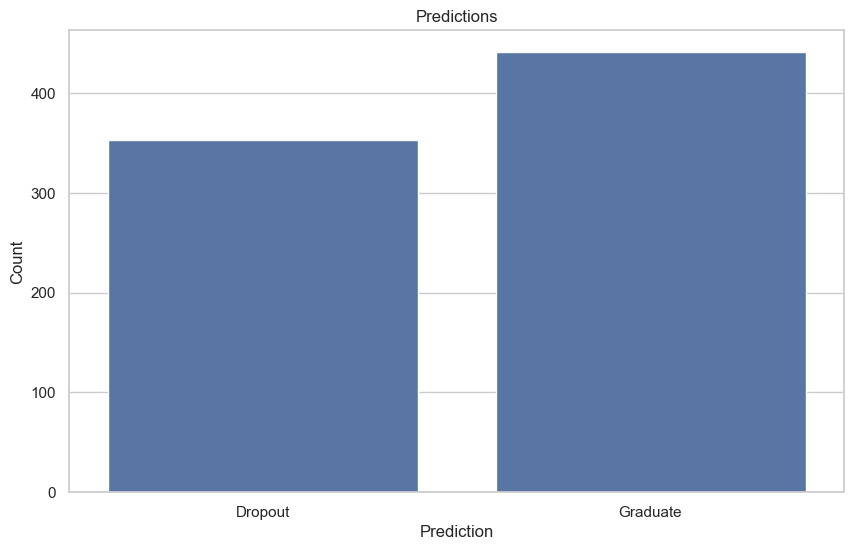

In [112]:
# plot predictions and label where 0 is graduate and 1 is dropout
plt.figure(figsize=(10,6))
sns.countplot(x="Prediction_cat", data=df_enrolled)
plt.title("Predictions")
plt.ylabel("Count")
plt.xlabel("Prediction")
plt.show()





